The first 8 questions are designed to conduct predictive analysis on the Bank Marketing dataset. The dataset is obtained from the UC Irvine Machine Learning Repository. It contains data related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The outcome is a binary variable with header ‘‘Y’’ indicating whether the customer subscribed a term deposit after the call. For a detailed description of the dataset, please check the source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing. The exact dataset we use for Part I is a subset of the Bank Marketing dataset.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix, precision_score, plot_roc_curve

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.shape

(4521, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


What is the average conversion rate of this marketing campaign? The conversion rate is the fraction of the outcomes where the outcome (i.e. the dependent variable) is “yes”. You can use whatever method you want to answer this question, such as SQL, a different routine in AzureML, or even downloading the data and examining it on your computer.

In [6]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [7]:
print("Average conversion rate is: ", 521/4000)

Average conversion rate is:  0.13025


First, assume that we want to use BALANCE and AGE as the explanatory variables, with Y as the dependent variable. Build an experiment, as covered in the lectures, to do this. Use 70% of the data as the training set, with the remaining 30% as the test set and default random seed of 0 as usual. Use the two-class decision forest, and as in class, set the number of decision trees to 1. Set the maximum depth to 3 (please note: this is different from the lectures where we had maximum depth 4). Leave all other parameters in the decision forest at their default values. After you complete building and successfully running your experiment, check the box below. Then, continue to answer the remaining questions using the output of your tree.

In [8]:
df2 = df[['balance','age','y']]

In [9]:
df2

,balance,age,y
0,1787,30,no
1,4789,33,no
2,1350,35,no
3,1476,30,no
4,0,59,no
...,...,...,...
4516,-333,33,no
4517,-3313,57,no
4518,295,57,no
4519,1137,28,no


In [10]:
X = df2.iloc[:,0:2]
y = df2.iloc[:,2]

In [11]:
X.values, y.values

(array([[1787,   30],
        [4789,   33],
        [1350,   35],
        ...,
        [ 295,   57],
        [1137,   28],
        [1136,   44]], dtype=int64),
 array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
X_train.shape, X_test.shape

((3164, 2), (1357, 2))

In [14]:
model = RandomForestClassifier(max_depth=3,random_state=0,n_estimators=1,min_samples_split=128,min_samples_leaf=1)

In [15]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=128,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [16]:
y_pred = model.predict(X_test)

In [17]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [18]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [19]:
y_pred_df = pd.DataFrame(data=y_pred,columns=['prediction'])

In [20]:
y_pred_df

,prediction
0,no
1,no
2,no
3,no
4,no
...,...
1352,no
1353,no
1354,no
1355,no


In [21]:
X_test = X_test.reset_index(drop=True)

In [22]:
compare_df = pd.concat([X_test,y_pred_df],axis=1)

In [23]:
compare_df

,balance,age,prediction
0,378,35,no
1,6248,31,no
2,0,30,no
3,529,42,no
4,168,41,no
...,...,...,...
1352,992,34,no
1353,575,56,no
1354,181,50,no
1355,306,56,no


Which of the range does the probability of a customer who is 65 years old and has a balance of $698 in his account subscribes a term deposit after the phone call?

In [24]:
compare_df[compare_df['balance'] == 698]

,balance,age,prediction


In [25]:
model.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.92857143, 0.07142857],
       [0.90956264, 0.09043736],
       ...,
       [0.90956264, 0.09043736],
       [0.90956264, 0.09043736],
       [0.86292135, 0.13707865]])

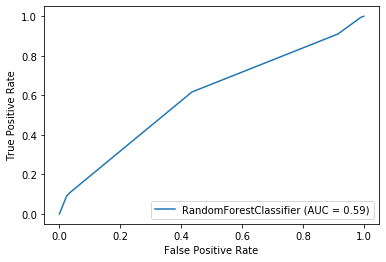

In [26]:
plot_roc_curve(model,X_test,y_test)

We will now change the model, to increase its accuracy. Now we will use AGE, BALANCE, DURATION and PREVIOUS as the explanatory variables. Build a decision forest with one decision tree with maximum depth of 4 (instead of 3 earlier) using 70% of the data as the training set and test the model on the remaining 30% of the data. Use your decision tree to answer Questions 4 - 6.

In [27]:
df3 = df[['balance','age','duration','previous','y']]

In [28]:
df3

,balance,age,duration,previous,y
0,1787,30,79,0,no
1,4789,33,220,4,no
2,1350,35,185,1,no
3,1476,30,199,0,no
4,0,59,226,0,no
...,...,...,...,...,...
4516,-333,33,329,0,no
4517,-3313,57,153,0,no
4518,295,57,151,0,no
4519,1137,28,129,3,no


In [29]:
X = df3.iloc[:,0:4]
y = df3.iloc[:,4]

In [30]:
X.values, y.values

(array([[1787,   30,   79,    0],
        [4789,   33,  220,    4],
        [1350,   35,  185,    1],
        ...,
        [ 295,   57,  151,    0],
        [1137,   28,  129,    3],
        [1136,   44,  345,    7]], dtype=int64),
 array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
X_train.shape, X_test.shape

((3164, 4), (1357, 4))

In [33]:
model2 = RandomForestClassifier(max_depth=4,random_state=0,n_estimators=1,min_samples_split=128,min_samples_leaf=1)

In [34]:
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=128,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
y_pred2 = model2.predict(X_test)

In [36]:
y_pred2

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

Within which range does the accuracy of the decision tree lie?

In [37]:
accuracy_score(y_test,y_pred2)

0.8747236551215918

In [38]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

          no       0.89      0.98      0.93      1190
         yes       0.45      0.09      0.15       167

    accuracy                           0.87      1357
   macro avg       0.67      0.54      0.54      1357
weighted avg       0.83      0.87      0.84      1357



In [39]:
cm = confusion_matrix(y_test,y_pred2)
cm

array([[1172,   18],
       [ 152,   15]], dtype=int64)

Look at the classification matrix and find the number of false positives. In what range does this number lie?

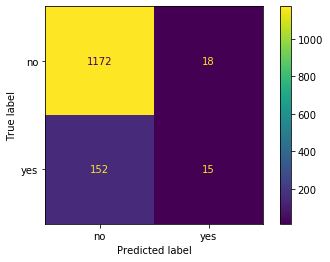

In [40]:
plot_confusion_matrix(model2,X_test,y_test, values_format='.4g')

If the model predicts the outcome will be “yes” for someone, what is the approximate likelihood that the prediction will be correct?

In [41]:
print(precision_score(y_test,y_pred2,average='macro'))

0.6698709145839055


We call the decision tree built using AGE and BALANCE as explanatory variables as tree A, the decision tree built using AGE, BALANCE, DURATION and PREVIOUS as the explanatory variables as tree B. Which of the following comparison between tree A and B is correct?

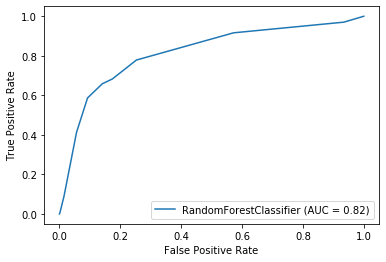

In [42]:
plot_roc_curve(model2,X_test,y_test)